####  Um exemplo para realizar mapas a partir dos dados KNMI WIND netCDF-4 - data plot

###### Copernicus marine service distribution wind data plot using python libray.



In [2]:
import numpy as np
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [3]:
### Plot definitions

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

In [4]:
''' Building Dataset - Montando o data-set'''

wind_d = xr.open_mfdataset('/home/bruno/git/CMEMS/wind_data/*.nc') #serie cmems monthly composite

wind_data = wind_d.reindex()

wind_d.close()
# wind_data.attrs
# wind_data.var

In [21]:
print(wind_d.attrs)

{'_NCProperties': 'version=1|netcdflibversion=4.4.1.1|hdf5libversion=1.8.20', 'title': 'Global Ocean - Wind - METOP-A ASCAT - 12km daily Descending V2', 'title_short_name': 'ASCATA-L3-Coastal', 'Conventions': 'CF-1.6', 'institution': 'EUMETSAT/OSI SAF/KNMI', 'source': 'MetOp-A ASCAT', 'software_identification_level_1': 1000, 'instrument_calibration_version': 0, 'software_identification_wind': 3202, 'pixel_size_on_horizontal': '12.5 km', 'service_type': 'N/A', 'processing_type': 'O', 'contents': 'ovw', 'granule_name': 'GLO-WIND_L3-OBS_METOP-A_ASCAT_COA_DES_20191231.nc', 'processing_level': 'L3', 'orbit_number': 68468, 'start_date': '2019-12-31', 'start_time': '00:00:00', 'stop_date': '2019-12-31', 'stop_time': '23:59:58', 'equator_crossing_longitude': ' 313.520', 'equator_crossing_date': '2019-12-30', 'equator_crossing_time': '23:59:08', 'rev_orbit_period': '6081.7', 'orbit_inclination': '98.7', 'history': 'N/A', 'references': 'ASCAT Wind Product User Manual, http://www.osi-saf.org/, ht

In [22]:
# CHECK DATA VARIABLES

print(wind_data.time)

<xarray.DataArray 'time' (time: 4373)>
array([cftime.DatetimeGregorian(2007, 1, 1, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 2, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 3, 0, 0, 0, 0), ...,
       cftime.DatetimeGregorian(2018, 12, 29, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 30, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2007-01-01 00:00:00 ... 2018-12-31 00:00:00
Attributes:
    standard_name:        time
    long_name:            Validity time
    axis:                 T
    _ChunkSizes:          1
    _CoordinateAxisType:  Time


In [6]:
# CHECK DATA FORMAT

print(wind_data.time)

<xarray.DataArray 'time' (time: 4373)>
array([cftime.DatetimeGregorian(2007, 1, 1, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 2, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 3, 0, 0, 0, 0), ...,
       cftime.DatetimeGregorian(2018, 12, 29, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 30, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2007-01-01 00:00:00 ... 2018-12-31 00:00:00
Attributes:
    standard_name:        time
    long_name:            Validity time
    axis:                 T
    _ChunkSizes:          1
    _CoordinateAxisType:  Time


In [7]:
# MAKE A VARIABLES OF DATA: Nomeando variáveis

lat = wind_data.lat
lon = wind_data.lon

v_s = wind_data.northward_wind.groupby("time.season").mean()

u_s= wind_data.eastward_wind.groupby("time.season").mean()

speed_s = wind_data.wind_speed.groupby("time.season").mean()

stress_mag = wind_data.wind_stress_magnitude.groupby("time.season").mean()

stress_curl = wind_data.stress_curl.groupby("time.season").mean()

curl = wind_data.wind_curl.groupby("time.season").mean()

wind_data.close()

/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: in

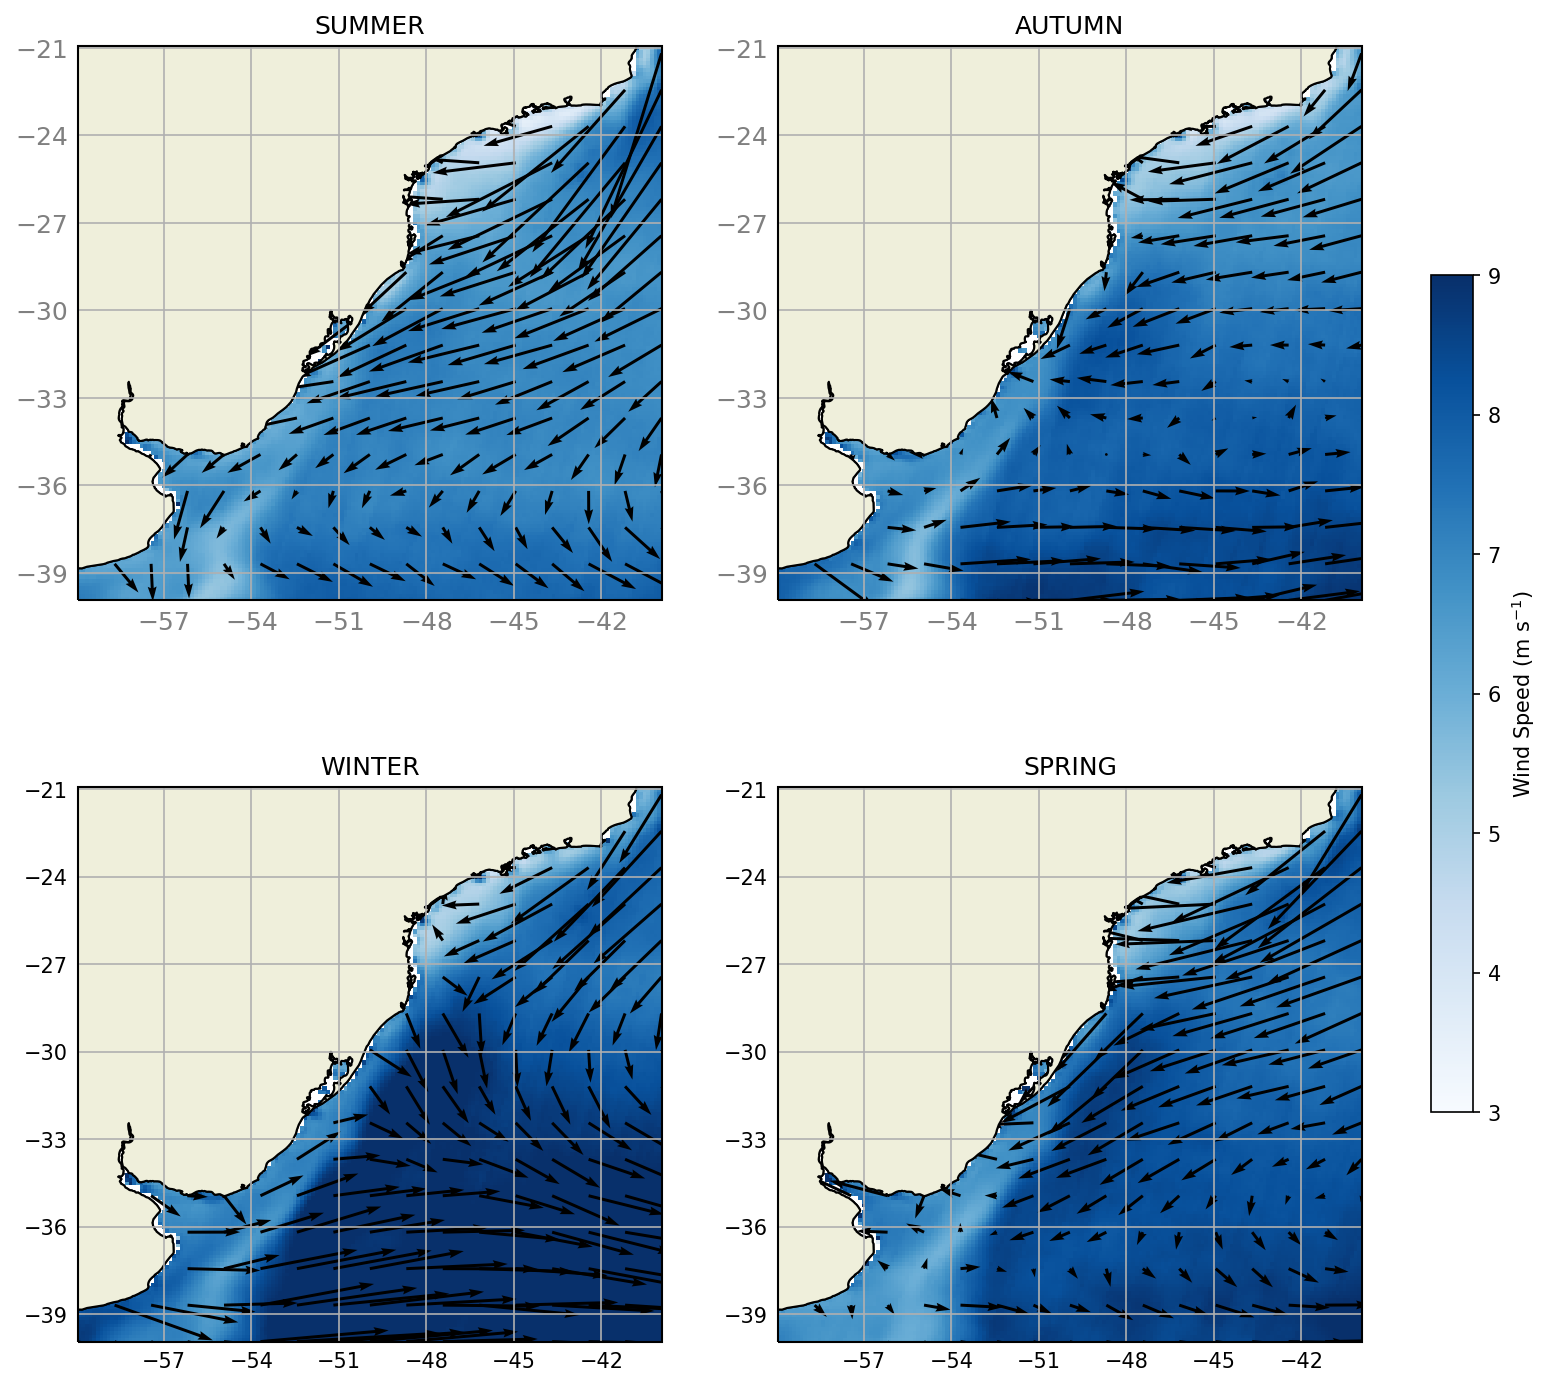

In [23]:
from matplotlib import gridspec

### CARTOPY WIND SPEED SUBPLOT ####

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=150)

gs  = gridspec.GridSpec(2, 2)

v = 10

# SUMMER - DJF

ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_summer = plt.pcolor(lon, lat, speed_s.sel(season='DJF'), vmin = 3, vmax= 9, cmap='Blues')
ax.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax.add_feature(land_poly)
g = ax.gridlines(draw_labels=True)
g.xlabels_top= False
g.ylabels_right = False
g.xlabel_style = {'size': 12, 'color': 'gray'}
g.ylabel_style = {'size': 12, 'color': 'gray'}
q = plt.quiver(lon.values[::v],lat.values[::v], 
               u_s.sel(season='DJF').values[::v,::v], v_s.sel(season='DJF').values[::v,::v], width=0.0051, scale = 20)


plt.title('Verão')

# AUTUMN - MAM

ax1 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_autumn = plt.pcolor(lon, lat, speed_s.sel(season='MAM'), vmin = 3, vmax= 9, cmap='Blues')
ax1.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax1.add_feature(land_poly)
g1 = ax1.gridlines(draw_labels=True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'gray'}
g1.ylabel_style = {'size': 12, 'color': 'gray'}
q = plt.quiver(lon.values[::v],lat.values[::v], 
               u_s.sel(season='MAM').values[::v,::v] , v_s.sel(season='MAM').values[::v,::v], width=0.0051, scale = 20)


plt.title('Outono')

### WINTER - JJA ####

ax2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_winter = plt.pcolor(lon, lat, speed_s.sel(season='JJA'), vmin = 3, vmax= 9, cmap='Blues')
ax2.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax2.add_feature(land_poly)
g2 = ax2.gridlines(draw_labels=True)
g2.xlabels_top= False
g2.ylabels_right = False
q = plt.quiver(lon.values[::v],lat.values[::v], 
               u_s.sel(season='JJA').values[::v,::v] , v_s.sel(season='JJA').values[::v,::v], width=0.0051, scale = 20)


plt.title('Inverno')

### Figure SPRING - SON ####

ax3 = plt.subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=0.0))
wind_spring = plt.pcolor(lon, lat, speed_s.sel(season='SON'), vmin = 3, vmax= 9, cmap='Blues')
ax3.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax3.add_feature(land_poly)
g3 = ax3.gridlines(draw_labels=True)
g3.xlabels_top= False
g3.ylabels_right = False
q = plt.quiver(lon.values[::v],lat.values[::v], 
               u_s.sel(season='SON').values[::v,::v] , v_s.sel(season='SON').values[::v,::v], width=0.0051, scale = 20)


plt.title('Primavera')

cbar = fig1.colorbar(wind_summer, ax=[ax, ax1, ax2, ax3], fraction=0.03)
cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.show()